# MNIST - L2 Classification Overfitting

> # Overfitting Issue

## Import Tensorflow & Keras

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
import keras
keras.__version__

'2.4.3'

# I. MNIST Data_set Load & Review

> ## 1) Load MNIST Data_Set

In [6]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [11]:
# Train_Data Information
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


In [10]:
# Test_Data Information
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


> ## 2) Visualization

<function matplotlib.pyplot.show>

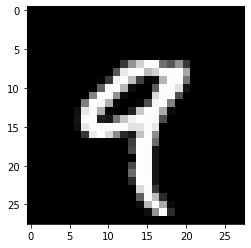

In [15]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap = 'gray')
plt.show

In [16]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# II.Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
  * (60000, 28, 28) to (60000, 784)


In [17]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [18]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

> ## 2) One Hot Encoding

In [19]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
  * 2개의 Hidden Layers & 768개의 Nodes
  * 복잡한 Model Capacity로 인한 Overfitting
  * L2 Reguliarization 적용

In [34]:
from keras import models
from keras import layers
from keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', 
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu',
                       kernel_regularizer= regularizers.l2(0.00001)))
mnist.add(layers.Dense(10, activation = 'softmax'))

In [35]:
# 모델 구조 확인
mnist.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [36]:
# 모델 학습방법 설정
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

In [37]:
%%time
Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4658 - accuracy: 0.8579 - val_loss: 0.1465 - val_accuracy: 0.9589
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1082 - accuracy: 0.9697 - val_loss: 0.1366 - val_accuracy: 0.9610
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0720 - accuracy: 0.9812 - val_loss: 0.0980 - val_accuracy: 0.9748
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0534 - accuracy: 0.9866 - val_loss: 0.0932 - val_accuracy: 0.9769
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0400 - accuracy: 0.9913 - val_loss: 0.0928 - val_accuracy: 0.9791
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0344 - accuracy: 0.9928 - val_loss: 0.1104 - val_accuracy: 0.9760
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0318 - accuracy: 0.9935 - val_loss: 0.1120 - val_accuracy: 0.9771

> ## 4) 학습 결과 시각화 - Overfitting

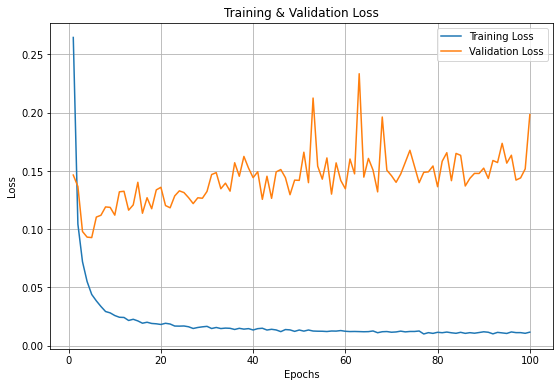

In [38]:
# Loss Visualization
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel( 'Loss' )
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

In [39]:
# Loss & Accuracy
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1791 - accuracy: 0.9743
Loss = 0.17914
Accuracy = 0.97430


> ## 6) Model Predict

In [40]:
# Proability
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1, :]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [41]:
# Class
print(mnist.predict_classes(X_test[:1, :]))

[7]
